In [1]:
import schist as scs
import scanpy as sc
import graph_tool.all as gt
import pandas as pd
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
adata = scs.io.read('../paul15_minimize')

In [3]:
state = adata.uns['schist']['state'].copy()

In [4]:
plt.get_backend()

'module://ipykernel.pylab.backend_inline'

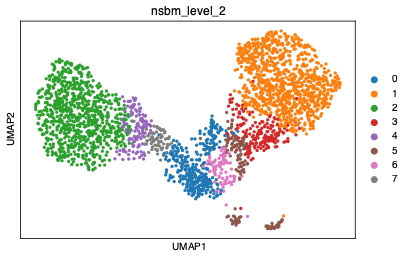

In [83]:
sc.pl.umap(adata, color='nsbm_level_2')

In [6]:
backend = plt.get_backend()

In [7]:
plt.switch_backend('GTK3Cairo')

In [84]:
g = state.g

In [85]:
fill_color = g.new_vertex_property('vector<double>')
g.vertex_properties['fill_color'] = fill_color
level = 2

In [86]:
key = 'nsbm'
level = 2
obs_key = f'{key}_level_{level}'
uns_key = f'{key}_level_{level}_colors'
adata_colors = adata.uns[uns_key]
categories = adata.obs[obs_key].cat.categories
colors = [mpl.colors.to_rgba(x) for x in adata_colors]
colors = dict(zip(categories, colors))
node_color = [colors[x] for x in adata.obs[obs_key]]
for v in range(len(node_color)):
    fill_color[v] = node_color[v]


Text(0.5, 1.0, 'nsbm_level_2')

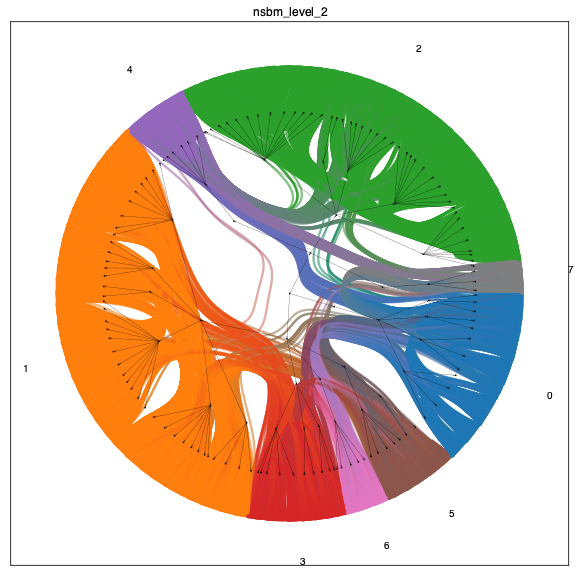

In [94]:
fig = plt.figure(figsize=(10, 10), frameon=False)
ax = fig.add_subplot(111)
pos, t, tpos = gt.draw_hierarchy(state,  
                   vertex_fill_color=g.vertex_properties['fill_color'], 
                   vertex_color=g.vertex_properties['fill_color'],  
                   hedge_color=[0, 0, 0, 1], 
                   hvertex_fill_color=[0, 0, 0, 1],
                   mplfig=ax)
coords = tpos.get_2d_array([0, 1]).T
state_len = np.array([len(x) for x in state.get_bs()])
dfc = pd.DataFrame(coords[:adata.shape[0]], index=adata.obs_names)
dfc = pd.concat([dfc, adata.obs[obs_key]], axis=1)
g_coords = dfc.groupby(obs_key).agg(mean).T
g_radius = np.sqrt(np.sum(g_coords**2, axis=0))
max_rx = g_radius.max() + 1
for group in g_coords.columns:
    text_p = g_coords[group] * max_rx / g_radius[group]
    ax.text(text_p[0], text_p[1], f'{group}')    
#for pn, pp in enumerate(coords[idx_s:idx_e]):
#    rx = np.sqrt(np.sum(pp**2))
#    text_p = pp * max_rx / rx
#    ax.text(text_p[0], text_p[1], f'{pn}')
ax.set_xticks([])    
ax.set_yticks([])
ax.set_title(obs_key)



In [89]:
g.num_vertices()

2730

In [90]:
max_rx

6.000000000000001

5.995339895164148

In [92]:
np

6.000000000000001